In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def likelihood(x, y, sigma, model, param):
    return (-1/2)*np.sum(((y-model(x, param))**2)/sigma**2)

In [0]:
def modelo(x, param):
    return x*param[0]+param[1]

x = np.linspace(0,10,1000)
p = [10, 15]
des = np.zeros(len(x))
for i in range(len(x)):
    des[i] = 0.1

y = x*p[0] + p[1]

In [0]:
def montecarlo_chain(x, y, sigma, model, p_i, n):

    L_v = likelihood(x, y, sigma, model, p_i)
    markov_chain = []
    markov_chain.append([p_i, L_v])
    
    for i in range(n):
        p_n = []
        p_n = [np.random.uniform(p_i[0]-sigma[0], p_i[0]+sigma[0]), np.random.uniform(p_i[1]-sigma[0], p_i[1]+sigma[0]) ]
        
        L_n = likelihood(x, y, sigma, model, p_n)
        
        if (L_n>L_v):
            markov_chain.append([p_n, L_n])
            p_i = p_n 
            L_v = L_n
            continue
        elif  (L_n/L_v > np.random.randn()):
            markov_chain.append([p_n, L_n])
        
    else:     
        return markov_chain
        
    return markov_chain

In [16]:
p_i = [4,10]
likelihood(x, y, des, modelo, p_i)

-76280030.03003001

In [0]:
sol = montecarlo_chain(x,y,des,modelo, p_i, 1000)


graph = np.zeros(len(sol))

for i in range(len(sol)):
    graph[i] = sol[i][1]

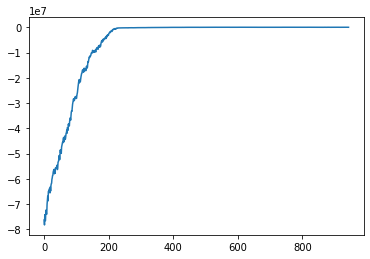

In [28]:
plt.plot(graph)
plt.show()